In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)  # 100个样本，每个样本一个特征
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2)  # 最高次项小于等于2
poly.fit(X)
X2 = poly.transform(X) # 添加特征

In [5]:
X2.shape  # 添加了2个特征，100个样本，每个样本3个特征

(100, 3)

In [6]:
X[:5, :]  # 观察x的系数

array([[-2.32301037],
       [ 2.90054297],
       [-0.87651593],
       [ 0.97335196],
       [-1.24357875]])

In [7]:
X2[:5, :]  # x**0, x**1, x**2 的系数

array([[ 1.        , -2.32301037,  5.39637719],
       [ 1.        ,  2.90054297,  8.41314954],
       [ 1.        , -0.87651593,  0.76828018],
       [ 1.        ,  0.97335196,  0.94741404],
       [ 1.        , -1.24357875,  1.54648812]])

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

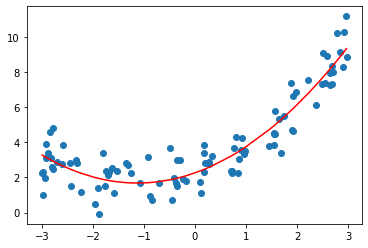

In [10]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

### 关于PolynomialFeature

In [11]:
X = np.arange(1, 11).reshape(-1, 2)

In [12]:
X # 2个特征

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [13]:
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
X2 = poly.transform(X)

In [14]:
X2.shape  # 添加了4个特征

(5, 6)

In [15]:
X2  # x**0,x1**1,x2**1,x1**2,x2*x2,x2**2的系数，可以发现最高次项不高于2次

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Pipeline
Pipeline可以将特征处理，数据归一化，线性回归，这3步都整合到一起。避免了对相同的步骤重复书写

In [16]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ('ploy', PolynomialFeatures(degree=2)),  # 特征处理，添加x**0, x**2的特征
    ('std_scaler', StandardScaler()),  # 数据归一化。当特征之间分布不均匀时
    ('lin_reg', LinearRegression())  # 线性回归
])

In [17]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

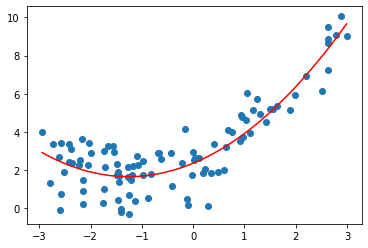

In [18]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color = 'r')
plt.show()